In [5]:
import os
import sys
import math
import time
import statistics
from datetime import datetime, timedelta
from dateutil import rrule
# import dateutil.relativedelta
import pandas as pd
# import modin.pandas as pd
# os.environ["MODIN_ENGINE"] = "dask" 
import numpy as np
from dask import dataframe as dd
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots as subplots
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import find_peaks
import talib
import pytz
import MetaTrader5 as mt5

In [539]:
################ MAIN ###################### 

### Settings ------------------------------

# symbols = ['GBPUSD','EURGBP','GBPAUD','GBPCAD','GBPJPY','GBPCHF','EURUSD','EURAUD','EURCAD','EURJPY','EURCHF','AUDUSD','USDCAD','USDJPY','USDCHF', 'AUDCAD', 'AUDJPY', 'AUDCHF', 'CADJPY', 'CADCHF', 'CHFJPY']
# symbols = ['GBPUSD_SB','EURGBP_SB','EURUSD','AUDUSD','USDCAD','USDCHF', 'XAUGBP_SB','XAUEUR_SB']
# symbols = ['GBPUSD','EURUSD','AUDUSD','USDCAD','USDCHF','USDJPY','EURGBP','XAUUSD','XAUEUR','XAGUSD','XTIUSD','XBRUSD','US2000','NAS100']
# symbols = ['GBPUSD','EURUSD','AUDUSD','USDCAD','USDCHF','USDJPY','EURGBP']
# symbols = ['GBPUSD']
symbol = 'EURUSD'
path ="F:/Tick CSVs/1 year"
# path ="F:/Tick CSVs/monthly/December"
# path ="F:/Tick CSVs/monthly/Jan 21"
# ticks_sample = np.arange(10,1100,10)
# ticks_sample = [4410, 3140, 1470]
# ticks_sample = [3140]
# ticks_limit = np.arange(1, 10)* 0.0001  #0.0021
# ticks_limit = [0.00010,0.00140, 0.00085]
# ticks_limit = [0.00001]
# rsi_limit= 2
# band_period= 35
# ticks_limit_offset = [1] # [0.5, 1, 2, 3, 4, 5]
# sample_size=1
lot_size = 1000
# renko_size=0.00050
# renko_sizes = np.arange(5, 17)* 0.00005
# renko_sizes =[0.00035]
renko_size = 0.00027 # percentage no 
tick_step =0.00001

timezone = pytz.timezone("Etc/UTC")
utc_from = datetime(2021, 1, 19, tzinfo=timezone) #  1/29  1/11  1/19  3/15 3/11 1/8 1/13 1/22 1/7 1/12 gbp2/25
utc_to = datetime(2021, 1, 19, tzinfo=timezone)
now = datetime.now(tz=timezone)
fridayclose = datetime(2000,1,1, 20, 0, 0, 0, tzinfo=timezone)
endofdayclose = datetime(2000,1,1, 20, 0, 0, 0, tzinfo=timezone)
swapclose = datetime(2000,1,1, 23, 58, 0, 0, tzinfo=timezone)
tradebegin = datetime(2000,1,1, 1, 5, 0, 0, tzinfo=timezone)

### -----------------------------------------
### Main functions

results = pd.DataFrame()
then=datetime.now()
# for symbol in symbols :

# get_data(symbol, utc_from,utc_to, now, timezone)
# r1 = AIO(inst, renko_size, endofdayclose, fridayclose, swapclose, lot_size, False)
# # #         r1 = AIO_no_charts(inst, renko_size, endofdayclose, fridayclose, swapclose, lot_size, False)
# r1=[symbol,'JMA100',renko_size] + r1
# results= results.append(pd.DataFrame(r1).T)

for day_from in rrule.rrule(rrule.DAILY, dtstart=utc_from, until=utc_to):
#     for renko_size in renko_sizes :
    day_to= day_from + timedelta(days=1)
    get_data(symbol, day_from, day_to, now, timezone)
##     r1 = AIO_2(inst, renko_size, endofdayclose, fridayclose, swapclose, lot_size, False)
#     r1 = AIO_3_short(inst, renko_size, endofdayclose, fridayclose, swapclose, tradebegin, lot_size, tick_step, False)
#     r1=[symbol,'AIO_short',renko_size] + r1
#     results= results.append(pd.DataFrame(r1).T)
    r2 = AIO_3_long(inst, renko_size, endofdayclose, fridayclose, swapclose, tradebegin, lot_size, tick_step, False)
    r2=[symbol,'AIO_long',renko_size] + r2
    results= results.append(pd.DataFrame(r2).T)
    
# #     for renko_size in renko_sizes :

#     r1 = AIO(inst, renko_size, endofdayclose, fridayclose, swapclose, lot_size, False)
# #         r1 = AIO_no_charts(inst, renko_size, endofdayclose, fridayclose, swapclose, lot_size, False)
#     r1=[symbol,'JMA100',renko_size] + r1
#     results= results.append(pd.DataFrame(r1).T)
#         try :
#             index = results[(results[0]==r1[0])& (results[1]==r1[1]) & (results[2]==r1[2])].index[0]
#             if r1[6] > results.loc[index,6] :
#                 results.loc[index,6] = r1[6]
#             if r1[7] < results.loc[index,7] :
#                 results.loc[index,7] = r1[7]
#             if r1[8] < results.loc[index,8] :
#                 results.loc[index,8] = r1[8]
#             results.loc[index,3] = results.loc[index,3] + r1[3]
#             results.loc[index,4] = results.loc[index,4] + r1[4]
#             results.loc[index,5] = results.loc[index,5] + r1[5]
#             results.loc[index,9] = results.loc[index,9] + r1[9]
#             results.loc[index,10] = results.loc[index,10] + r1[10]
#             results.loc[index,11] = results.loc[index,11] + r1[11]
#             results.loc[index,12] = results.loc[index,12] + r1[12]
#         except :
#             results= results.append(pd.DataFrame(r1).T)

results[4]=results[4] / results[3] * 100
results[5]=results[5] / results[3] * 100
results.columns= ['Symbol','Method','Renko Size','Trades','Wins %','Loses %','Mean Max Pts','Mean Min Pts','Max Pts','Min Pts','Drawdown','Total Spread', 'Total Points', 'Gross Points', 'Gross Profit £']
results =results.reset_index(drop=True)
now=datetime.now()
print(now-then)

# to do:
#     risk tolerace system==
#     speed

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.33
<--connected-->
-- EURUSD  Ticks received: 140980 From:  2021-01-19 00:00:00+00:00 To:  2021-01-20 00:00:00+00:00
<--disconnected-->
Gross profit: £-3.48
0:00:10.947626


In [523]:
results.sort_values(by='Gross Profit £', ascending=False)

Symbol    Method Renko Size Trades   Wins %  Loses % Mean Max Pts  \
0  EURUSD  AIO_long    0.00027     63  28.5714  71.4286      0.00032   

  Mean Min Pts  Max Pts  Min Pts Drawdown Total Spread Total Points  \
0     -0.00022  0.00155 -0.00052 -0.00061            0     -0.00421   

  Gross Points Gross Profit £  
0     -0.00421          -3.48

In [ ]:
pd.set_option('display.max_rows', 500)
# results
results.sort_values(by='Gross Profit £', ascending=False)
# results[['Method','Trades','Wins %','Gross Points', 'Gross Profit £']].groupby(by='Method').sum().sort_values(by='Gross Profit £', ascending=False)

In [349]:
pd.set_option('display.max_rows', 500)
# results.sort_values(by='Gross Profit £', ascending=False)
# results[['Symbol', 'Gross Profit £']].groupby(by='Symbol').sum()
# results['Mean Max Pts'].mean()
# results['Mean Min Pts'].mean()
# results['Max Pts'].max()
# results['Min Pts'].min()
# results['Drawdown'].mean()
# results['Drawdown'].min()
# results['Wins %'].fillna(0).sum() / (results['Wins %'].fillna(0).sum() + results['Loses %'].fillna(0).sum()) * 100
# results['Loses %'].fillna(0).sum() / (results['Wins %'].fillna(0).sum() + results['Loses %'].fillna(0).sum()) * 100
results[['Method','Trades','Wins %','Gross Points', 'Gross Profit £']].groupby(by='Method').sum().sort_values(by='Gross Profit £', ascending=False)
# results.loc[results['Method']==0.00050].sort_values(by='Gross Profit £', ascending=False)

Trades      Wins %  Gross Points  Gross Profit £
Method                                                    
AIO_long    1223  768.429642      -0.00757           -6.22

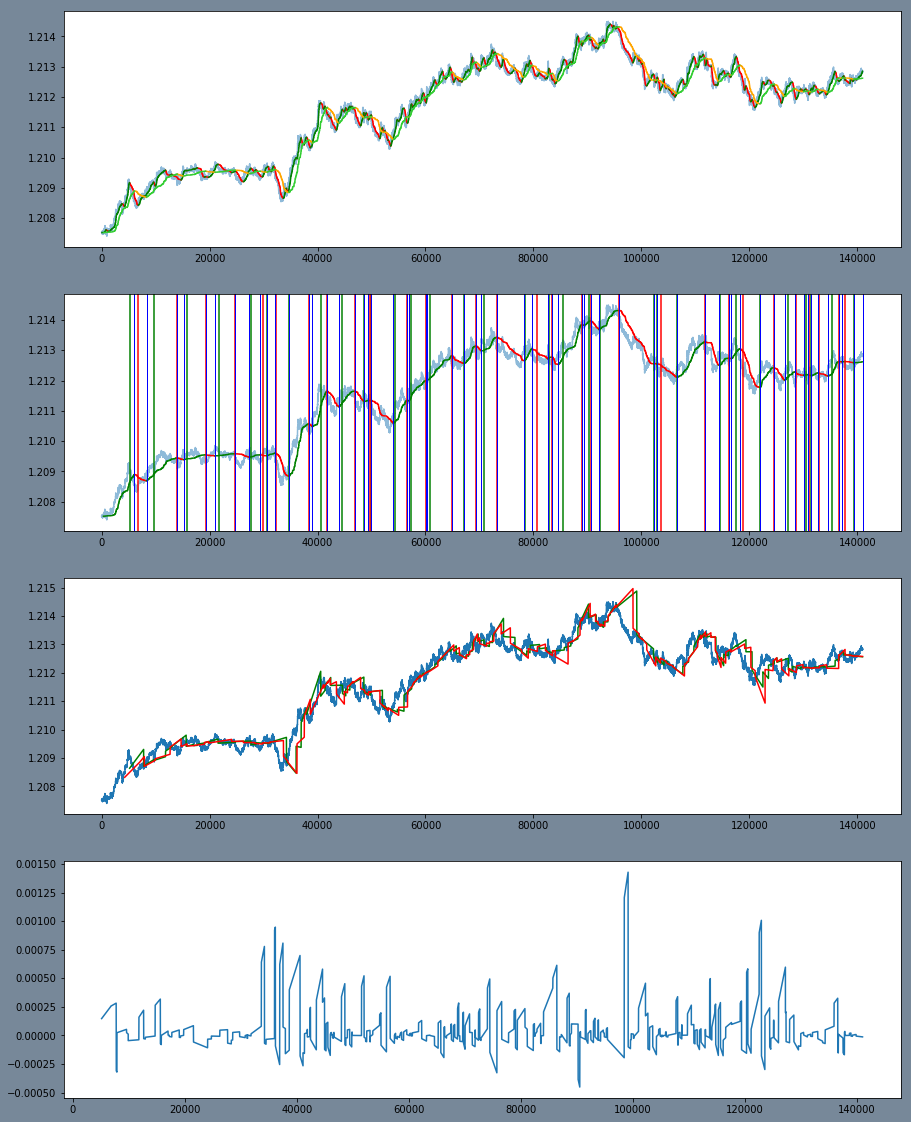

In [542]:
#Matplotlib

f = plt.figure(facecolor='LightSlateGray')
f.set_figwidth(15)
f.set_figheight(20)

num_rows= 4

#plot 1:
plt.subplot(num_rows, 1, 1)
plt.plot(inst.index.to_numpy(),inst['bid'], alpha=0.5)
# plt.plot(inst.index.to_numpy(), speed_chart)
# plt.plot(inst.index.to_numpy(), np.array(p2_chart))
# plt.plot(inst.index.to_numpy(), np.array(p1_chart))
plt.plot(inst.index.to_numpy(),jma_1_minus_chart,color = 'red')
plt.plot(inst.index.to_numpy(),jma_1_plus_chart,color = 'green')
plt.plot(inst.index.to_numpy(),jma_2_minus_chart,color = 'orange')
plt.plot(inst.index.to_numpy(),jma_2_plus_chart,color = 'limegreen')
# plt.plot(inst.index.to_numpy(), p1_chart,color='black')
# plt.plot(inst.index.to_numpy(),jma_2_neut_chart,color = 'grey')
# plt.plot(inst.index.to_numpy(),jma_3_minus_chart,color = 'pink')
# plt.plot(inst.index.to_numpy(),jma_3_plus_chart,color = 'pink')
# plt.plot(inst.index.to_numpy(), speed_renko_chart)
# plt.axhline(y = 0, color = 'b', linestyle = '-')
# for b in bought :
#     plt.axvline(x = b, color = 'g',linewidth= 1.5)
# for s in sold :
#     plt.axvline(x = s, color = 'r',linewidth= 1.5)
# for c in closed :
#     plt.axvline(x = c, color = 'b',linewidth= 1)

#plot 2:
plt.subplot(num_rows, 1, 2)
plt.plot(inst.index.to_numpy(),inst['bid'], alpha=0.5)
# plt.plot(inst.index.to_numpy(), ((np.array(speed_chart)*1)-np.array(inst['bid']))*-1)
# plt.plot(inst.index.to_numpy(), np.array(inst['bid']-np.array(inst['bid'][0]))-(np.array(speed_chart)))
# plt.plot(inst.index.to_numpy(), np.array(inst['bid']-np.array(inst['bid'][0])))
# plt.plot(inst.index.to_numpy(), speed_chart)
# plt.plot(inst.index.to_numpy(), np.array(p2_chart))
# plt.plot(inst.index.to_numpy(),jma_0_minus_chart,color = 'red')
# plt.plot(inst.index.to_numpy(),jma_0_plus_chart,color = 'green')
# plt.plot(inst.index.to_numpy(),jma_1_minus_chart,color = 'red')
# plt.plot(inst.index.to_numpy(),jma_1_plus_chart,color = 'green')
plt.plot(inst.index.to_numpy(),jma_2_minus_chart,color = 'red')
plt.plot(inst.index.to_numpy(),jma_2_plus_chart,color = 'green')
# plt.plot(inst.index.to_numpy(), p1_chart)
# plt.plot(inst.index.to_numpy(), p2_chart,color='black')
# plt.plot(inst.index.to_numpy(), p3_chart)
# plt.plot(inst.index.to_numpy(), np.array(p1_chart)*-1)
# plt.plot(inst.index.to_numpy(), speed_jma_chart)
# plt.plot(inst.index.to_numpy(), np.array(macd_chart)*-1)
# plt.plot(inst.index.to_numpy(),jma_minus_2_pct_chart)
# plt.plot(inst.index.to_numpy(),jma_plus_2_pct_chart)
# plt.plot(inst.index.to_numpy(),jma_neut_2_pct_chart)
# plt.plot(inst.index.to_numpy(),jma_3_minus_chart,color = 'orange')
# plt.plot(inst.index.to_numpy(),jma_3_plus_chart,color = 'limegreen')
# plt.plot(inst.index.to_numpy(), jma_)
# plt.axhline(y = 0, color = 'grey', linestyle = '-')
# plt.ylim(0.60, 0.70)
# plt.ylim(-0.025, 0.025)
# plt.semilogy()
for b in bought :
    plt.axvline(x = b, color = 'g',linewidth= 1.5)
for s in sold :
    plt.axvline(x = s, color = 'r',linewidth= 1.5)
for c in closed :
    plt.axvline(x = c, color = 'b',linewidth= 1)

#plot 3:
plt.subplot(num_rows, 1, 3)
plt.plot(inst.index.to_numpy(), inst['bid'])
# plt.plot(inst.index.to_numpy(), (inst['bid']-np.array(p2_chart)))
# plt.plot(inst.index.to_numpy(), (inst['bid']-np.array(p3_chart)))
# plt.plot(inst.index.to_numpy(), np.array(speed_chart)-np.array(p1_chart))
# plt.plot(inst.index.to_numpy(),jma_2_minus_chart,color = 'red')
# plt.plot(inst.index.to_numpy(),jma_2_plus_chart,color = 'green')
plt.plot(inst.index.to_numpy(), p1_chart, color='green')
plt.plot(inst.index.to_numpy(), p2_chart, color='red')
# plt.plot(inst.index.to_numpy(), p3_chart, color='red')
# plt.plot(inst.index.to_numpy(), jma_minus_2_pct_chart,color = 'orange')
# plt.plot(inst.index.to_numpy(), jma_plus_2_pct_chart,color = 'limegreen')
# plt.axhline(y = 0, color = 'b', linestyle = '-')
# for b in bought :
#     plt.axvline(x = b, color = 'g',linewidth= 1.5)
# for s in sold :
#     plt.axvline(x = s, color = 'r',linewidth= 1.5)

#plot 4:
plt.subplot(num_rows, 1, 4)
plt.plot(inst.index.to_numpy(), (np.array(p1_chart)-np.array(p2_chart)))

plt.show()

In [ ]:
####

In [ ]:
# Plotly

num_rows= 2
fig = subplots(rows=num_rows, cols=1)

# fig.add_trace(go.Scatter(x=inst.index, y=renko_org_chart,name='renko org',line_color='red',line_width=1.5,hovertext=inst['datetime']), row=4, col=1)

# fig.add_trace(go.Scatter(x=inst.index, y=renko_mean_chart,name='renko mean',line_color='violet',line_width=1.5,hovertext=inst['datetime']), row=1, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=renko_chart,name='renko', line_color='red',line_width=1.5,hovertext=inst['datetime']), row=2, col=1)
fig.add_trace(go.Scatter(x=inst.index, y=inst['bid'],name='bid',line_color='Blue',line_width=1.5,hovertext=inst['datetime']), row=2, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=inst['bid'],name='bid',line_color='AliceBlue',line_width=1.5,hovertext=inst['datetime']), row=2, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=speed_chart,name='speed',line_color='red',line_width=1.5,hovertext=inst['datetime']), row=1, col=1)


# fig.add_trace(go.Scatter(x=inst.index, y=jma_2_chart,name='JMA2',line_color='orange',line_width=1.5), row=1, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=jma_3_chart,name='JMA3',line_color='blue',line_width=1.5), row=1, col=1)

# fig.add_trace(go.Scatter(x=inst.index, y=jma_0_plus_chart,name='JMA0 +',line_color='ForestGreen',line_width=1.5), row=1, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=jma_0_minus_chart,name='JMA0 -',line_color='HotPink',line_width=1.5), row=1, col=1)

fig.add_trace(go.Scatter(x=inst.index, y=jma_1_plus_chart,name='JMA1 +',line_color='Green',line_width=1.5), row=1, col=1)
fig.add_trace(go.Scatter(x=inst.index, y=jma_1_minus_chart,name='JMA1 -',line_color='Pink',line_width=1.5), row=1, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=jma_plus_0_chart,name='JMA0 +',line_color='limegreen',line_width=1.5), row=2, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=jma_minus_0_chart,name='JMA0 -',line_color='orange',line_width=1.5), row=2, col=1)


# fig.add_trace(go.Scatter(x=inst.index, y=jma_period_chart,name='JMA1 period',line_width=1.5), row=3, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=jma_period_2_chart,name='JMA2 period',line_width=1.5), row=3, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=up_chart,name='up',line_color='green',line_width=1.5), row=3, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=down_chart,name='down',line_color='red',line_width=1.5), row=3, col=1)

for b in bought:
    fig.add_shape(type='line',x0=b,x1=b,y0=-0.00150,y1=0.00150,line_color='green',line_width=1, row=1, col=1)
for s in sold:
    fig.add_shape(type='line',x0=s,x1=s,y0=-0.00150,y1=0.00150,line_color='red',line_width=1, row=1, col=1)
for c in closed:
    fig.add_shape(type='line',x0=c,x1=c,y0=-0.00150,y1=0.00150,line_color='black',line_width=1, row=1, col=1)

# fig.add_trace(go.Scatter(x=inst.index, y=np.array(inst['bid']-np.array(inst['bid'][0])),name='bid',line_width=1.5), row=1, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=np.array(inst['bid']-np.array(inst['bid'][0]))-(np.array(speed_chart)*-1),name='speed dif',line_width=1.5), row=1, col=1)

# fig.add_trace(go.Scatter(x=inst.index, y=jma_2_plus_chart,name='JMA2 +',line_color='Green',line_width=1.5), row=2, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=jma_2_minus_chart,name='JMA2 -',line_color='Pink',line_width=1.5), row=2, col=1)
fig.add_trace(go.Scatter(x=inst.index, y=jma_3_plus_chart,name='JMA2 +',line_color='Green',line_width=1.5), row=2, col=1)
fig.add_trace(go.Scatter(x=inst.index, y=jma_3_minus_chart,name='JMA2 -',line_color='Pink',line_width=1.5), row=2, col=1)
# fig.add_trace(go.Scatter(x=inst.index, y=p2_chart,name='p2',line_color='grey',line_width=1.5), row=2, col=1)

# fig.update_yaxes(dtick = 0.1)
# fig.update_yaxes(type="log")
# fig.update_yaxes(hoverformat = '.5f')
# fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_yaxes(fixedrange = False)
fig.update_xaxes(rangeslider_thickness=0.004*num_rows)
fig.update_layout(autosize=False, width=900, height=350*num_rows, margin=dict(l=20, r=20, b=20, t=20))
# fig.update_layout(xaxis=dict(type="date",spikedash = 'solid',spikethickness = 1,spikecolor = 'grey'))
fig.update_layout(hovermode ="x unified")
fig.update_xaxes(matches='x')
# fig.update_xaxes(matches='x', hoverformat = '.5f')
fig.show("notebook")

In [538]:
# All in one 3 long!!

def AIO_3_long (frame, renko_size, endofdayclose, fridayclose, swapclose, tradebegin, lot_size, tick_step, print_txt) :
    global bought, sold, closed
    global renko_chart
    global jma_1_minus_chart,jma_1_plus_chart,jma_2_minus_chart,jma_2_plus_chart,jma_3_minus_chart,jma_3_plus_chart
    global jma_0_minus_chart, jma_0_plus_chart
    global p1_chart, p2_chart, p3_chart
#     global jma_chart, jma_2_chart, jma_3_chart
    global macd_jma_chart, macd_chart
    global jma_minus_2_pct_chart, jma_plus_2_pct_chart, jma_neut_2_pct_chart
    global jma_2_neut_chart, jma_1_neut_chart
    global speed_chart, speed_jma_chart
    
    long_open = False
    short_open= False
    pos_open_price = np.nan
    total_profit=0
    no_trades=0
    min_profit=0
    max_profit=0
    min_profit_sum=0
    max_profit_sum=0
    profit=0
    loses=0
    wins=0
    profit_GBP = 0
    total_profit_GBP = 0
    total_spread = 0
    to_close=False
    drawdown = 0
    drawdown_time = np.nan
    drawdown_GBP = np.nan
    bought=[]
    sold=[]
    closed=[]
    soldlock=False
    boughtlock=False
    jma_1_prev=np.nan
    jma_1_plus=float('nan')
    jma_1_minus=float('nan')
    jma_1_minus_chart=[]
    jma_1_plus_chart=[]
    Filt0=np.nan
    Det0=np.nan
    Det1=np.nan
    jma_1=np.nan
    renko_chart=[]
    renko=0
    ind=-1
#     tick_sum=0
#     tick_count=0
    renko_ind=-1
#     renko_mean=np.nan
#     renko_mean_chart=[]
    jma_2_prev=np.nan
    jma_2_plus=float('nan')
    jma_2_minus=float('nan')
    jma_2_minus_chart=[]
    jma_2_plus_chart=[]
    Filt0_2=np.nan
    Det0_2=np.nan
    Det1_2=np.nan
    jma_2=np.nan
    renko_up=0
    renko_down=0
    jma_3_prev=float('nan')
    jma_3_plus=float('nan')
    jma_3_minus=float('nan')
    jma_3_minus_chart=[]
    jma_3_plus_chart=[]
    Filt0_3=np.nan
    Det0_3=np.nan
    Det1_3=np.nan
    jma_3=np.nan
    Filt0_0=np.nan
    Det0_0=np.nan
    Det1_0=np.nan
    jma_0=0
    jma_0_prev=0
    jma_0_chart=[]
    jma_0_plus=float('nan')
    jma_0_minus=float('nan')
    jma_0_minus_chart=[]
    jma_0_plus_chart=[]
    p1_chart=[]
    p2_chart=[]
    p3_chart=[]
#     jma_3_chart=[]
#     jma_2_chart=[]
#     jma_1_chart=[]
    renko_prev=np.nan
    renko_sum=3  #3 default!
    renko_count=1
    macd=np.nan
    macd_chart=[]
#     macd_jma=np.nan
#     Filt0_macd=np.nan
#     Det0_macd=np.nan
#     Det1_macd=np.nan
#     macd_jma_chart=[]
    jma_minus_count=0
    jma_plus_count=0
#     jma_last=np.nan
#     jma_pct=np.nan
    jma_2_pct=0
    jma_minus_2_pct=0
    jma_plus_2_pct=0
    jma_neut_2_pct=0
    jma_minus_2_pct_chart=[]
    jma_plus_2_pct_chart=[]
    jma_neut_2_pct_chart=[]
#     jma_2_pct_jma=np.nan
#     Filt0_2_pct=np.nan
#     Det0_2_pct=np.nan
#     Det1_2_pct=np.nan
#     jma_2_pct_jma_chart=[]
    period_1=10
    jma_2_neut=np.nan
    jma_2_neut_chart=[]
    jma_3_neut=np.nan
    jma_1_neut=np.nan
    jma_1_neut_chart=[]
    period_2=150
    
    if (len(inst)>0) :
        last_dt=inst.to_numpy()[-1][2]
        first_speed=inst['bid'][0]
        renko_3=first_speed
    else:
        last_dt=np.nan
        first_speed=np.nan
    
    speed_list = [first_speed] * 1000
    speed_chart=[]
    speed=first_speed
    speed_prev=first_speed
    speed_abs=first_speed
    speed_jma_chart=[]
    speed_renko=0
    speed_renko_2=0
    open_speed=np.nan
#     mashed = np.nan
        
    max_trades=100
    profit_tres=False
#     pos_max_profit=0
#     profit_close=0.00020
    renko_size_00=0.00003 #3 5
    renko_size_0=0.00008 #9  8
    renko_size_1=0.00013 #15  13
    renko_size_2=0.00025
    renko_size_3=0.00035
    renko_2=0
    renko_2_prev=np.nan
#     renko_3=0
    renko_3_prev=np.nan
    ROC=0
    
    jma_minus_count_sum=[]
    jma_plus_count_sum=[]
    
    x_s=[np.nan,np.nan,np.nan]
    y_s=[np.nan,np.nan,np.nan]
    x_r=[np.nan,np.nan,np.nan]
    y_r=[np.nan,np.nan,np.nan]
    x_speed=[np.nan,np.nan]
    y_speed=[np.nan,np.nan]
    
    for bid, ask, dt, spread in frame.to_numpy() :


        ind+=1
        close=bid
        spread= 0
#         volume+=1
#         tick_count+=1
#         tick_sum+=bid

#         if (total_profit >= 0.00110):
#             break
        
        if (long_open == True) :
            profit = close-pos_open_price - spread
        elif(short_open == True) :
            profit = pos_open_price-close - spread
        
        if (long_open == True) | (short_open == True) :
#             if profit > pos_max_profit :
#                 pos_max_profit = profit
            if (profit > renko_size) | (profit < -renko_size) :
                profit_tres=True
            
#         x1=1
#         y1=1.2245
#         x2=1000
#         y2=1.22452
# #         support_line=((((y2-y1)/(x2-x1))* ind) + (y1-(((y2-y1)/(x2-x1))*x1)))    #m=((y2-y1)/(x2-x1))   c=y1-(m*x1)
#         support_line=((((y[1]-y[0])/(x[1]-x[0]))* ind) + (y[0]-(((y[1]-y[0])/(x[1]-x[0]))*x[0])))

        speed_list.pop(0)
        speed_list.append(bid)
        speed_prev=speed
        speed=((speed_list[-1])-speed_list[0])
        speed_abs=abs(speed)
#         speed=np.mean(speed_list)
        speed_chart.append(speed)

#         if (speed - speed_renko >= renko_size_3) :
#             speed_renko=speed
#             jma_0_prev=jma_0
#             jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(speed_renko, 150, 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
#         elif (speed_renko - speed >= renko_size_3) :
#             speed_renko=speed
#             jma_0_prev=jma_0
#             jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(speed_renko, 150, 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
        
#         if (speed_abs - speed_renko_2 >= renko_size_3) :
#             speed_renko_2=speed_abs
#             jma_1_prev= jma_1
#             jma_1,Filt0,Det0,Det1 = JMA_one(speed_renko_2, 150, 5, 1, jma_1,Filt0,Det0,Det1)
#         elif (speed_renko_2 - speed_abs >= renko_size_3) :
#             speed_renko_2=speed_abs
#             jma_1_prev= jma_1
#             jma_1,Filt0,Det0,Det1 = JMA_one(speed_renko_2, 150, 5, 1, jma_1,Filt0,Det0,Det1)

#         if (speed_prev >= 0 >= speed ) | (speed_prev <= 0 <= speed) :
#             x_speed.pop(0)
#             x_speed.append(ind)
#             y_speed.pop(0)
#             y_speed.append(close)
#         speed_line=((((y_s[2]-y_s[0])/(x_s[2]-x_s[0]))* ind) + (y_s[0]-(((y_s[2]-y_s[0])/(x_s[2]-x_s[0]))*x_s[0])))
        
        #----------------------------------------------

        
        if (close - renko >= renko_size_00) : 
            renko=close
            jma_1_prev= jma_1
            jma_1,Filt0,Det0,Det1 = JMA_one(renko, period_2, 5, 1, jma_1,Filt0,Det0,Det1)
        elif (renko - close >= renko_size_00) :   
            renko=close
            jma_1_prev= jma_1
            jma_1,Filt0,Det0,Det1 = JMA_one(renko, period_2, 5, 1, jma_1,Filt0,Det0,Det1)

        if (close - renko_2 >= renko_size_0) :
            renko_2=close
            jma_2_prev= jma_2
            jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko_2, period_2, 5, 1, jma_2,Filt0_2,Det0_2,Det1_2)
        elif (renko_2 - close >= renko_size_0) :  
            renko_2=close
            jma_2_prev= jma_2
            jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko_2, period_2, 5, 1, jma_2,Filt0_2,Det0_2,Det1_2)
            
        if (close - renko_3 >= renko_size_1) : #(0.00400-jma_0)/10)
            renko_3=close
            jma_3_prev= jma_3
            jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko_3, period_2, 5, 1, jma_3,Filt0_3,Det0_3,Det1_3)
            ROC= (jma_3-jma_3_prev)/jma_3_prev
        elif (renko_3 - close >= renko_size_1) :
            renko_3=close
            jma_3_prev= jma_3
            jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko_3, period_2, 5, 1, jma_3,Filt0_3,Det0_3,Det1_3)
            ROC= (jma_3-jma_3_prev)/jma_3_prev
        
        #---- CHARTS --------------------------------------------------------------------------------
            
#         if jma_0 - jma_0_prev >0.00000 :
#             jma_0_plus=jma_0
#             jma_0_minus=float('nan')
#         elif jma_0_prev - jma_0 >0.00000 :
#             jma_0_minus=jma_0
#             jma_0_plus=float('nan')
#         jma_0_minus_chart.append(jma_0_minus)
#         jma_0_plus_chart.append(jma_0_plus)
        
        if jma_1 - jma_1_prev >0.0000 :
            jma_1_plus=jma_1
            jma_1_minus=float('nan')
#             jma_1_neut=float('nan')
            jma_plus_count+=1
            jma_minus_count=0
            if jma_plus_count == 1 :
                x_s.pop(0)
                x_s.append(ind)
                y_s.pop(0)
                y_s.append(jma_2)
        elif jma_1_prev - jma_1 >0.0000  :
            jma_1_minus=jma_1
            jma_1_plus=float('nan')
            jma_minus_count+=1
            jma_plus_count=0
            if jma_minus_count == 1 :
                x_r.pop(0)
                x_r.append(ind)
                y_r.pop(0)
                y_r.append(jma_2)
#             jma_1_neut=float('nan')
#         if abs(jma_1 - jma_1_prev) < 0.00001 :
#             jma_1_neut=jma_1
        jma_1_minus_chart.append(jma_1_minus)
        jma_1_plus_chart.append(jma_1_plus)
#         jma_1_neut_chart.append(jma_1_neut)
        
        if jma_2 - jma_2_prev >0.0000 :
            jma_2_plus=jma_2
            jma_2_minus=float('nan')
#             jma_2_neut=float('nan')
        elif jma_2_prev - jma_2 >0.0000 :
            jma_2_minus=jma_2
            jma_2_plus=float('nan')
#             jma_2_neut=float('nan')
#         if abs(jma_2 - jma_2_prev) < 0.00001 :
#             jma_2_neut=jma_2
        jma_2_minus_chart.append(jma_2_minus)
        jma_2_plus_chart.append(jma_2_plus)
#         jma_2_neut_chart.append(jma_2_neut)

        if jma_3 - jma_3_prev >0.0000 :
            jma_3_plus=jma_3
            jma_3_minus=float('nan')
#             jma_3_neut=float('nan')
        elif jma_3_prev - jma_3 >0.0000 :
            jma_3_minus=jma_3
            jma_3_plus=float('nan')
#             jma_3_neut=float('nan')
#         if abs(jma_3 - jma_3_prev) < 0.00001 :
#             jma_3_neut=jma_3
        jma_3_minus_chart.append(jma_3_minus)
        jma_3_plus_chart.append(jma_3_plus)

#         if jma_2_pct - jma_2_pct_prev >0.00000 :
#             jma_plus_2_pct=jma_2_pct
#             jma_minus_2_pct=float('nan')
#             if (jma != jma_last) :
#                 jma_plus_count+=1
#                 jma_minus_count=0
#                 jma_last=jma
#         elif jma_2_pct_prev - jma_2_pct >0.00000 :
#             jma_minus_2_pct=jma_2_pct
#             jma_plus_2_pct=float('nan')
#             if (jma != jma_last) :
#                 jma_minus_count+=1
#                 jma_plus_count=0
#                 jma_last=jma
#         jma_minus_2_pct_chart.append(jma_minus_2_pct)
#         jma_plus_2_pct_chart.append(jma_plus_2_pct)

        #####-------------------------------------------------------

        support_line=((((y_s[2]-y_s[0])/(x_s[2]-x_s[0]))* ind) + (y_s[0]-(((y_s[2]-y_s[0])/(x_s[2]-x_s[0]))*x_s[0])))
        resistance_line=((((y_r[2]-y_r[0])/(x_r[2]-x_r[0]))* ind) + (y_r[0]-(((y_r[2]-y_r[0])/(x_r[2]-x_r[0]))*x_r[0])))
        
        #####-------------------------------------------------------
    
#         renko_chart.append(renko)
        p1_chart.append(resistance_line)
        p2_chart.append(support_line)
        p3_chart.append(speed_line)
#         jma_2_pct_jma_chart.append(jma_2_pct_jma)
#         macd_chart.append(macd)
#         macd_jma_chart.append(macd_jma)
#         jma_plus_2_pct_chart.append(jma_plus_2_pct)
#         jma_minus_2_pct_chart.append(jma_minus_2_pct)
#         jma_neut_2_pct_chart.append(jma_neut_2_pct)

        #---------------------------------------------
        
        
        
#         if (long_open == False) & (short_open == False) :

#         jma_plus_op=jma_2_plus
#         jma_minus_op=jma_2_minus
#         jma_plus_op_2=jma_2_plus
#         jma_minus_op_2=jma_2_minus

#         jma_plus_cl=jma_2_plus
#         jma_minus_cl=jma_2_minus

        #----------------------
    

        if (long_open == True) | (short_open == True) :
#             if ( (pd.to_datetime(dt).time() > swapclose.time()) ) :
#                 to_close=True
            if (dt==last_dt) :
                to_close=True

#             if (long_open == True) & ( ((profit_tres==True)&(profit<=profit_close)) 
#                                    | ( (close<jma_2) & (np.isnan(jma_plus)) & (np.isnan(jma_plus_0)) ) ): #& (np.isnan(jma_plus)) #& (close<jma_minus_cl):#&(close<jma) : # | (np.isnan(jma_plus_cl_2))) :
#             if (long_open == True) & (posren_jma<posren_jma_2) & (np.isnan(jma_plus)) & (np.isnan(jma_plus_0)) : 
#             if (long_open == True) & (np.isnan(jma_2_plus)) & (np.isnan(jma_2_neut)) :
            if (long_open ==True ) & (np.isnan(jma_2_plus)) :
                to_close=True

#             elif (short_open == True) & ( ((profit_tres==True)&(profit<=profit_close)) 
#                                       | ( (close>jma_2) & (np.isnan(jma_minus)) & (np.isnan(jma_minus_0)) ) ): #& (np.isnan(jma_minus))  #& (close>jma_plus_cl):#&(close>jma) : # | (np.isnan(jma_minus_cl_2)))  :
#             elif (short_open == True) & (posren_jma>posren_jma_2) & (np.isnan(jma_minus)) & (np.isnan(jma_minus_0)) :
#             elif (short_open == True) & (np.isnan(jma_2_minus)) & (np.isnan(jma_2_neut)) :
            elif (short_open == True) & (np.isnan(jma_2_minus)) :
                to_close=True


#             if (long_open == True) & (profit< -0.00050) :
#                 to_close=True 
#             elif (short_open == True) & (profit< -0.00050) :
#                 to_close=True

            if (to_close==True) :
                if (long_open == True) :
                    long_open = False
#                     profit = close-pos_open_price - spread
                elif(short_open == True) :
                    short_open = False
#                     profit = pos_open_price-close - spread
                total_profit += profit
                total_spread += spread
                no_trades += 1
                to_close=False
                pos_open_price = np.nan
                closed.append(ind)
#                 position_renko_1=0
#                 position_renko_2=0
                profit_tres=False
                pos_max_profit=0
                if (profit > max_profit):
                    max_profit= profit
                if (profit < min_profit):
                    min_profit= profit
                if (profit <= 0):
                    loses+=1
                    min_profit_sum+=profit
                elif (profit > 0):
                    wins+=1
                    max_profit_sum+=profit
#                 if (sym[0:3]=='GBP') :
                profit_GBP = (lot_size / bid)*profit # GBPXXX
#                 else :
#                     profit_GBP = lot_size*profit         # XXXGBP
                total_profit_GBP += profit_GBP
                if print_txt == True :
                    print('closed {0} {1}; profit: {2:.5f}'.format(ind, dt, profit))
                    print('total_profit {:.2f}'.format(total_profit_GBP))
    #                 print('spread',spread)
            elif (long_open == True) & ((close-pos_open_price - spread)< drawdown) :
                drawdown = close-pos_open_price - spread  
                drawdown_time =dt
#                 if (sym[0:3]=='GBP') :
#                     drawdown_GBP = (lot_size / close)*drawdown # GBPXXX
#                 else :
                drawdown_GBP = lot_size*drawdown # XXXGBP
            elif(short_open == True) & ((pos_open_price-close - spread)< drawdown) :
                drawdown = pos_open_price-close - spread
                drawdown_time =dt
#                 if (sym[0:3]=='GBP') :
#                     drawdown_GBP = (lot_size / close)*drawdown # GBPXXX
#                 else :
                drawdown_GBP = lot_size*drawdown # XXXGBP
            
        
#         if  (jma_1<jma_3) :
#             boughtlock=False
#         if  (jma_1>jma_3) :
#             soldlock=False
            
        if (long_open == False) & (short_open == False) & (pd.to_datetime(dt).time() < swapclose.time()) & (no_trades<max_trades) : #& (position_renko_mean<1.8) :
            
#             if (boughtlock==False) & (jma_3>jma_2) & (jma_plus_count<=5) & (np.isnan(jma_plus_2)==False) & (renko>jma_2) & (np.isnan(jma_plus)==False) & (np.isnan(jma_plus_0)==False) : #& (0<close-jma_3<renko_size*2)
#             if (boughtlock==False) & (posren_jma>posren_jma_2) & (np.isnan(jma_plus)==False) : #(position_renko_1<=0)
#             if (boughtlock==False) & (np.isnan(jma_2_plus)==False)  :
            if (boughtlock==False) & (jma_2>resistance_line) & (np.isnan(jma_2_plus)==False)  :
#                 boughtlock=True
                long_open = True
                pos_open_price = close
                open_speed= speed
                profit_tres=False
                max_price = close
                bought.append(ind)
                if print_txt ==True :
                    print('bought {0} {1}'.format(ind,dt))

#             if (soldlock==False) & (jma_3<jma_2) & (jma_minus_count<=5) & (np.isnan(jma_minus_2)==False) & (renko<jma_2) & (np.isnan(jma_minus)==False) & (np.isnan(jma_minus_0)==False) : #& (0<jma_3-renko<renko_size*2)
#             if (soldlock==False) & (posren_jma<posren_jma_2) & (np.isnan(jma_minus)==False) : #& (position_renko_1<=0)
            if (soldlock==False) & (jma_2<support_line) & (np.isnan(jma_2_minus)==False) :
#                 soldlock=True
                short_open = True
                pos_open_price = close
                open_speed= speed
                profit_tres=False
                max_price = close
                sold.append(ind)
                if print_txt ==True :
                    print('sold__{0} {1}'.format(ind,dt))   

            
        #---------------------------------------------
    print("Gross profit: £{:.2f}".format(total_profit_GBP)) 
    if print_txt == True :
        print("No of trades: {}; Wins: {} {:.2f}%; Loses: {} {:.2f}%".format(no_trades,wins,wins/no_trades,loses,loses/no_trades))
        print("Max pips: {:.5f}; Min pips: {:.5f}; Drawdown: {:.5f} at {};".format(max_profit,min_profit, drawdown, drawdown_time))
        print("Spread cost: {:.5f}; total pips: {:.5f}; Gross pips: {:.5f}".format(total_spread, total_profit, total_profit-total_spread))
        print("Gross profit: £{:.2f}".format(total_profit_GBP))  
    if no_trades == 0:
        no_trades=np.nan
    if wins == 0 :
        wins=np.nan
    if loses == 0 :
        loses=np.nan
    return [no_trades,wins,loses,round(max_profit_sum/wins,5),round(min_profit_sum/loses,5),max_profit,min_profit,drawdown,total_spread, total_profit, (total_profit-total_spread),round(total_profit_GBP,2)]

In [3]:
######
######
######
######
######
######
######
######
######

In [125]:
# # All short!!

# def AIO_3_short (frame, renko_size, endofdayclose, fridayclose, swapclose, tradebegin, lot_size, tick_step, print_txt) :
# #     global bought, sold, closed
# #     global renko_chart
# #     global jma_1_minus_chart,jma_1_plus_chart,jma_2_minus_chart,jma_2_plus_chart,jma_3_minus_chart,jma_3_plus_chart
# #     global jma_0_minus_chart, jma_0_plus_chart
# #     global p1_chart, p2_chart
# # #     global jma_chart, jma_2_chart, jma_3_chart
# #     global macd_jma_chart, macd_chart
# #     global jma_minus_2_pct_chart, jma_plus_2_pct_chart, jma_neut_2_pct_chart
# #     global jma_2_neut_chart, jma_1_neut_chart
# #     global speed_chart, speed_jma_chart
    
#     long_open = False
#     short_open= False
#     pos_open_price = np.nan
#     total_profit=0
#     no_trades=0
#     min_profit=0
#     max_profit=0
#     min_profit_sum=0
#     max_profit_sum=0
#     profit=0
#     loses=0
#     wins=0
#     profit_GBP = 0
#     total_profit_GBP = 0
#     total_spread = 0
#     to_close=False
#     drawdown = 0
#     drawdown_time = np.nan
#     drawdown_GBP = np.nan
#     bought=[]
#     sold=[]
#     closed=[]
#     soldlock=False
#     boughtlock=False
#     jma_1_prev=np.nan
#     jma_1_plus=float('nan')
#     jma_1_minus=float('nan')
#     jma_1_minus_chart=[]
#     jma_1_plus_chart=[]
#     Filt0=np.nan
#     Det0=np.nan
#     Det1=np.nan
#     jma_1=np.nan
#     renko_chart=[]
#     renko=0
#     ind=-1
# #     tick_sum=0
# #     tick_count=0
#     renko_ind=-1
# #     renko_mean=np.nan
# #     renko_mean_chart=[]
#     jma_2_prev=0
#     jma_2_plus=float('nan')
#     jma_2_minus=float('nan')
#     jma_2_minus_chart=[]
#     jma_2_plus_chart=[]
#     Filt0_2=np.nan
#     Det0_2=np.nan
#     Det1_2=np.nan
#     jma_2=np.nan
#     renko_up=0
#     renko_down=0
#     jma_3_prev=0
#     jma_3_plus=float('nan')
#     jma_3_minus=float('nan')
#     jma_3_minus_chart=[]
#     jma_3_plus_chart=[]
#     Filt0_3=np.nan
#     Det0_3=np.nan
#     Det1_3=np.nan
#     jma_3=np.nan
#     Filt0_0=np.nan
#     Det0_0=np.nan
#     Det1_0=np.nan
#     jma_0=np.nan
#     jma_0_prev=np.nan
#     jma_0_chart=[]
#     jma_0_plus=float('nan')
#     jma_0_minus=float('nan')
#     jma_0_minus_chart=[]
#     jma_0_plus_chart=[]
#     p1_chart=[]
#     p2_chart=[]
# #     jma_3_chart=[]
# #     jma_2_chart=[]
# #     jma_1_chart=[]
#     renko_prev=np.nan
#     renko_sum=3  #3 default!
#     renko_count=1
#     macd=np.nan
#     macd_chart=[]
# #     macd_jma=np.nan
# #     Filt0_macd=np.nan
# #     Det0_macd=np.nan
# #     Det1_macd=np.nan
# #     macd_jma_chart=[]
# #     jma_minus_count=0
# #     jma_plus_count=0
# #     jma_last=np.nan
# #     jma_pct=np.nan
#     jma_2_pct=np.nan
#     jma_minus_2_pct=np.nan
#     jma_plus_2_pct=np.nan
#     jma_neut_2_pct=np.nan
#     jma_minus_2_pct_chart=[]
#     jma_plus_2_pct_chart=[]
#     jma_neut_2_pct_chart=[]
# #     jma_2_pct_jma=np.nan
# #     Filt0_2_pct=np.nan
# #     Det0_2_pct=np.nan
# #     Det1_2_pct=np.nan
# #     jma_2_pct_jma_chart=[]
#     period_1=10
#     jma_2_neut=np.nan
#     jma_2_neut_chart=[]
#     jma_3_neut=np.nan
#     jma_1_neut=np.nan
#     jma_1_neut_chart=[]
    
#     speed_list = [np.nan] * 5000
#     speed_chart=[]
#     speed=0
#     speed_jma_chart=[]
#     speed_renko=0
    
#     if (len(inst)>0) :
#         last_dt=inst.to_numpy()[-1][2]
#     else:
#         last_dt=np.nan
        
#     max_trades=100
# #     profit_tres=False
# #     pos_max_profit=0
# #     profit_close=0.00020

#     for bid, ask, dt, spread in frame.to_numpy() :


#         ind+=1
#         close=bid
#         spread= 0
# #         volume+=1
# #         tick_count+=1
# #         tick_sum+=bid
        
#         if (long_open == True) :
#             profit = close-pos_open_price - spread
#         elif(short_open == True) :
#             profit = pos_open_price-close - spread
        
# #         if (long_open == True) | (short_open == True) :
# #             if profit > pos_max_profit :
# #                 pos_max_profit = profit
# #             if profit >= renko_size :
# #                 profit_tres=True

#         speed_list.pop(0)
#         speed_list.append(bid)
#         speed_prev=speed
#         speed=speed_list[-1]-speed_list[0]
# #         speed_chart.append(speed)

#         if (speed - speed_renko >= renko_size) :
#             speed_renko=speed
#             jma_0_prev=jma_0
#             jma_1_prev= jma_1
#             jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(speed_renko, 10, 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
#             jma_1,Filt0,Det0,Det1 = JMA_one(speed_renko, period_2, 5, 1, jma_1,Filt0,Det0,Det1)
#         elif (speed_renko - speed >= renko_size) :
#             speed_renko=speed
#             jma_0_prev=jma_0
#             jma_1_prev= jma_1
#             jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(speed_renko, 10, 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
#             jma_1,Filt0,Det0,Det1 = JMA_one(speed_renko, period_2, 5, 1, jma_1,Filt0,Det0,Det1)
        
#         #----------------------------------------------

        
#         if (close - renko >= renko_size) :  #>= renko_up_pct :
#             renko_up+=1
#             if renko_down > 0 :
#                 renko_sum+=renko_down
#                 renko_count+=1
#             renko_down=0
#             renko=close
# #             renko_ind+=1
#             position_renko_mean=renko_sum/renko_count
#             period_2=25* (1+(3*abs(position_renko_mean)))

# #             jma_1_prev= jma_1
#             jma_2_prev= jma_2
#             jma_3_prev= jma_3
# #             macd_jma_prev=macd_jma
# #             jma_prev_0=jma_0
# #             jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(renko ,25 , 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
            
# #             jma_1,Filt0,Det0,Det1 = JMA_one(renko, period_1, 5, 1, jma_1,Filt0,Det0,Det1)
#             jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko, 10, 5, 1, jma_2,Filt0_2,Det0_2,Det1_2)
#             jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko, period_2, 5, 1, jma_3,Filt0_3,Det0_3,Det1_3)
#             macd=jma_2-jma_1
# #             macd_jma,Filt0_macd,Det0_macd,Det1_macd = JMA_one(macd, 25, 5, 1, macd_jma,Filt0_macd,Det0_macd,Det1_macd)
            
# #             jma_pct_prev=jma_pct
# #             jma_pct= (jma_1-jma_1_prev)/abs(jma_1_prev)
#             jma_2_pct_prev=jma_2_pct
#             jma_2_pct= (jma_2-jma_2_prev)/abs(jma_2_prev)
# #             jma_2_pct_jma,Filt0_2_pct,Det0_2_pct,Det1_2_pct = JMA_one(jma_2_pct, 25, 5, 1, jma_2_pct_jma,Filt0_2_pct,Det0_2_pct,Det1_2_pct)
            
#             if jma_2_pct - jma_2_pct_prev > 0.00000 :
#                 jma_plus_2_pct=jma_2_pct
#                 jma_minus_2_pct=float('nan') 
#                 jma_neut_2_pct=float('nan') 
#             elif jma_2_pct_prev - jma_2_pct >0.00000 :
#                 jma_minus_2_pct=jma_2_pct
#                 jma_plus_2_pct=float('nan')
#                 jma_neut_2_pct=float('nan') 
#             elif abs(jma_2_pct_prev - jma_2_pct) == 0.00000 :
#                 jma_neut_2_pct=jma_2_pct
#                 jma_minus_2_pct=float('nan') 
#                 jma_plus_2_pct=float('nan')
                
# #             if jma_2_pct > jma_2_pct_jma :
# #                 jma_plus_count+=1
# #                 jma_minus_count=0
# #             elif jma_2_pct < jma_2_pct_jma :
# #                 jma_minus_count+=1
# #                 jma_plus_count=0
                
# #             tick_count=0
# #             tick_sum=0
    
    
#         elif (renko - close >= renko_size) :     # renko_down_pct : 
#             renko_down+=1
#             if renko_up > 0 :
#                 renko_sum+=renko_up
#                 renko_count+=1
#             renko_up=0
#             renko=close
# #             renko_ind+=1
#             position_renko_mean=renko_sum/renko_count
#             period_2=25* (1+(3*abs(position_renko_mean)))

# #             jma_1_prev= jma_1
#             jma_2_prev= jma_2
#             jma_3_prev= jma_3
# #             macd_jma_prev=macd_jma
# #             jma_prev_0=jma_0
# #             jma_0,Filt0_0,Det0_0,Det1_0 = JMA_one(renko , 10 , 5, 1, jma_0,Filt0_0,Det0_0,Det1_0)
            
# #             jma_1,Filt0,Det0,Det1 = JMA_one(renko, period_1, 5, 1, jma_1,Filt0,Det0,Det1)
#             jma_2,Filt0_2,Det0_2,Det1_2 = JMA_one(renko, 10, 5, 1, jma_2,Filt0_2,Det0_2,Det1_2)
#             jma_3,Filt0_3,Det0_3,Det1_3 = JMA_one(renko, period_2, 5, 1, jma_3,Filt0_3,Det0_3,Det1_3)
#             macd=jma_2-jma_1
# #             macd_jma,Filt0_macd,Det0_macd,Det1_macd = JMA_one(macd, 25, 5, 1, macd_jma,Filt0_macd,Det0_macd,Det1_macd)
            
# #             jma_pct_prev=jma_pct
# #             jma_pct= (jma_1-jma_1_prev)/abs(jma_1_prev)
#             jma_2_pct_prev=jma_2_pct
#             jma_2_pct= (jma_2-jma_2_prev)/abs(jma_2_prev)
# #             jma_2_pct_jma,Filt0_2_pct,Det0_2_pct,Det1_2_pct = JMA_one(jma_2_pct, 25, 5, 1, jma_2_pct_jma,Filt0_2_pct,Det0_2_pct,Det1_2_pct)
            
#             if jma_2_pct - jma_2_pct_prev > 0.00000 :
#                 jma_plus_2_pct=jma_2_pct
#                 jma_minus_2_pct=float('nan') 
#                 jma_neut_2_pct=float('nan') 
#             elif jma_2_pct_prev - jma_2_pct >0.00000 :
#                 jma_minus_2_pct=jma_2_pct
#                 jma_plus_2_pct=float('nan')
#                 jma_neut_2_pct=float('nan') 
#             elif abs(jma_2_pct_prev - jma_2_pct) == 0.00000 :
#                 jma_neut_2_pct=jma_2_pct
#                 jma_minus_2_pct=float('nan') 
#                 jma_plus_2_pct=float('nan')
                
# #             if jma_2_pct > jma_2_pct_jma :
# #                 jma_plus_count+=1
# #                 jma_minus_count=0
# #             elif jma_2_pct < jma_2_pct_jma :
# #                 jma_minus_count+=1
# #                 jma_plus_count=0

# #             tick_count=0
# #             tick_sum=0
            
            
#         #---- CHARTS --------------------------------------------------------------------------------
            
#         if jma_0 - jma_0_prev >0.00000 :
#             jma_0_plus=jma_0
#             jma_0_minus=float('nan')
#         elif jma_0_prev - jma_0 >0.00000 :
#             jma_0_minus=jma_0
#             jma_0_plus=float('nan')
# #         jma_0_minus_chart.append(jma_0_minus)
# #         jma_0_plus_chart.append(jma_0_plus)
        
#         if jma_1 - jma_1_prev >0.0000 :
#             jma_1_plus=jma_1
#             jma_1_minus=float('nan')
# #             jma_1_neut=float('nan')
#         elif jma_1_prev - jma_1 >0.0000  :
#             jma_1_minus=jma_1
#             jma_1_plus=float('nan')
# #             jma_1_neut=float('nan')
# #         if abs(jma_1 - jma_1_prev) < 0.00001 :
# #             jma_1_neut=jma_1
# #         jma_1_minus_chart.append(jma_1_minus)
# #         jma_1_plus_chart.append(jma_1_plus)
# #         jma_1_neut_chart.append(jma_1_neut)
        
#         if jma_2 - jma_2_prev >0.0000 :
#             jma_2_plus=jma_2
#             jma_2_minus=float('nan')
# #             jma_2_neut=float('nan')
#         elif jma_2_prev - jma_2 >0.0000 :
#             jma_2_minus=jma_2
#             jma_2_plus=float('nan')
# #             jma_2_neut=float('nan')
# #         if abs(jma_2 - jma_2_prev) < 0.00001 :
# #             jma_2_neut=jma_2
# #         jma_2_minus_chart.append(jma_2_minus)
# #         jma_2_plus_chart.append(jma_2_plus)
# #         jma_2_neut_chart.append(jma_2_neut)

#         if jma_3 - jma_3_prev >0.0000 :
#             jma_3_plus=jma_3
#             jma_3_minus=float('nan')
# #             jma_3_neut=float('nan')
#         elif jma_3_prev - jma_3 >0.0000 :
#             jma_3_minus=jma_3
#             jma_3_plus=float('nan')
# #             jma_3_neut=float('nan')
# #         if abs(jma_3 - jma_3_prev) < 0.00001 :
# #             jma_3_neut=jma_3
# #         jma_3_minus_chart.append(jma_3_minus)
# #         jma_3_plus_chart.append(jma_3_plus)

# #         if jma_2_pct - jma_2_pct_prev >0.00000 :
# #             jma_plus_2_pct=jma_2_pct
# #             jma_minus_2_pct=float('nan')
# #             if (jma != jma_last) :
# #                 jma_plus_count+=1
# #                 jma_minus_count=0
# #                 jma_last=jma
# #         elif jma_2_pct_prev - jma_2_pct >0.00000 :
# #             jma_minus_2_pct=jma_2_pct
# #             jma_plus_2_pct=float('nan')
# #             if (jma != jma_last) :
# #                 jma_minus_count+=1
# #                 jma_plus_count=0
# #                 jma_last=jma
# #         jma_minus_2_pct_chart.append(jma_minus_2_pct)
# #         jma_plus_2_pct_chart.append(jma_plus_2_pct)


# #         renko_chart.append(renko)
# #         p1_chart.append(profit)
# #         p2_chart.append(period_2)
# #         jma_2_pct_jma_chart.append(jma_2_pct_jma)
# #         macd_chart.append(macd)
# #         macd_jma_chart.append(macd_jma)
# #         jma_plus_2_pct_chart.append(jma_plus_2_pct)
# #         jma_minus_2_pct_chart.append(jma_minus_2_pct)
# #         jma_neut_2_pct_chart.append(jma_neut_2_pct)

#         #---------------------------------------------
        
        
        
# #         if (long_open == False) & (short_open == False) :

# #         jma_plus_op=jma_2_plus
# #         jma_minus_op=jma_2_minus
# #         jma_plus_op_2=jma_2_plus
# #         jma_minus_op_2=jma_2_minus

# #         jma_plus_cl=jma_2_plus
# #         jma_minus_cl=jma_2_minus

#         #----------------------
    

#         if (long_open == True) | (short_open == True) :
# #             if ( (pd.to_datetime(dt).time() > swapclose.time()) ) :
# #                 to_close=True
#             if (dt==last_dt) :
#                 to_close=True

# #             if (long_open == True) & ( ((profit_tres==True)&(profit<=profit_close)) 
# #                                    | ( (close<jma_2) & (np.isnan(jma_plus)) & (np.isnan(jma_plus_0)) ) ): #& (np.isnan(jma_plus)) #& (close<jma_minus_cl):#&(close<jma) : # | (np.isnan(jma_plus_cl_2))) :
# #             if (long_open == True) & (posren_jma<posren_jma_2) & (np.isnan(jma_plus)) & (np.isnan(jma_plus_0)) : 
# #             if (long_open == True) & (np.isnan(jma_2_plus)) & (np.isnan(jma_2_neut)) :
#             if (boughtlock == True) & (((jma_1<0) & (jma_0>jma_1) & (np.isnan(jma_0_minus)==False)) & (jma_2<jma_3)) :
#                 boughtlock=False
#             if (long_open ==True) & (np.isnan(jma_0_minus)==False) :
#                 to_close=True
                

# #             elif (short_open == True) & ( ((profit_tres==True)&(profit<=profit_close)) 
# #                                       | ( (close>jma_2) & (np.isnan(jma_minus)) & (np.isnan(jma_minus_0)) ) ): #& (np.isnan(jma_minus))  #& (close>jma_plus_cl):#&(close>jma) : # | (np.isnan(jma_minus_cl_2)))  :
# #             elif (short_open == True) & (posren_jma>posren_jma_2) & (np.isnan(jma_minus)) & (np.isnan(jma_minus_0)) :
# #             elif (short_open == True) & (np.isnan(jma_2_minus)) & (np.isnan(jma_2_neut)) :
#             elif (soldlock == True) & (((jma_1>0) & (jma_0<jma_1) & (np.isnan(jma_0_plus)==False)) & (jma_2>jma_3)) :
#                 soldlock=False
#             if (short_open ==True) & (np.isnan(jma_0_plus)==False) :
#                 to_close=True

#             if (long_open == True) & (profit< -0.00050) :
#                 to_close=True 
#             elif (short_open == True) & (profit< -0.00050) :
#                 to_close=True

#             if (to_close==True) :
#                 if (long_open == True) :
#                     long_open = False
# #                     profit = close-pos_open_price - spread
#                 elif(short_open == True) :
#                     short_open = False
# #                     profit = pos_open_price-close - spread
#                 total_profit += profit
#                 total_spread += spread
#                 no_trades += 1
#                 to_close=False
#                 pos_open_price = np.nan
#                 closed.append(ind)
# #                 position_renko_1=0
# #                 position_renko_2=0
#                 profit_tres=False
#                 pos_max_profit=0
#                 if (profit > max_profit):
#                     max_profit= profit
#                 if (profit < min_profit):
#                     min_profit= profit
#                 if (profit <= 0):
#                     loses+=1
#                     min_profit_sum+=profit
#                 elif (profit > 0):
#                     wins+=1
#                     max_profit_sum+=profit
# #                 if (sym[0:3]=='GBP') :
#                 profit_GBP = (lot_size / bid)*profit # GBPXXX
# #                 else :
# #                     profit_GBP = lot_size*profit         # XXXGBP
#                 total_profit_GBP += profit_GBP
#                 if print_txt == True :
#                     print('closed {0} {1}; profit: {2:.5f}'.format(ind, dt, profit))
#                     print('total_profit {:.2f}'.format(total_profit_GBP))
#     #                 print('spread',spread)
#             elif (long_open == True) & ((close-pos_open_price - spread)< drawdown) :
#                 drawdown = close-pos_open_price - spread  
#                 drawdown_time =dt
# #                 if (sym[0:3]=='GBP') :
# #                     drawdown_GBP = (lot_size / close)*drawdown # GBPXXX
# #                 else :
#                 drawdown_GBP = lot_size*drawdown # XXXGBP
#             elif(short_open == True) & ((pos_open_price-close - spread)< drawdown) :
#                 drawdown = pos_open_price-close - spread
#                 drawdown_time =dt
# #                 if (sym[0:3]=='GBP') :
# #                     drawdown_GBP = (lot_size / close)*drawdown # GBPXXX
# #                 else :
#                 drawdown_GBP = lot_size*drawdown # XXXGBP
            
        
# #         if (np.isnan(jma_plus_op)) :
# #             boughtlock=False
# #         if (np.isnan(jma_minus_op)) :
# #             soldlock=False
            
#         if (long_open == False) & (short_open == False) & (pd.to_datetime(dt).time() < swapclose.time()) & (no_trades<max_trades) : #& (position_renko_mean<1.8) :
            
# #             if (boughtlock==False) & (jma_3>jma_2) & (jma_plus_count<=5) & (np.isnan(jma_plus_2)==False) & (renko>jma_2) & (np.isnan(jma_plus)==False) & (np.isnan(jma_plus_0)==False) : #& (0<close-jma_3<renko_size*2)
# #             if (boughtlock==False) & (posren_jma>posren_jma_2) & (np.isnan(jma_plus)==False) : #(position_renko_1<=0)
# #             if (boughtlock==False) & (np.isnan(jma_2_plus)==False)  :
#             if (boughtlock==False) & (jma_1>0) & (jma_0<jma_1) & (np.isnan(jma_0_plus)==False) & (jma_2>jma_3) :
#                 boughtlock=True
#                 long_open = True
#                 pos_open_price = close
#                 max_price = close
#                 bought.append(ind)
#                 if print_txt ==True :
#                     print('bought {0} {1}'.format(ind,dt))

# #             if (soldlock==False) & (jma_3<jma_2) & (jma_minus_count<=5) & (np.isnan(jma_minus_2)==False) & (renko<jma_2) & (np.isnan(jma_minus)==False) & (np.isnan(jma_minus_0)==False) : #& (0<jma_3-renko<renko_size*2)
# #             if (soldlock==False) & (posren_jma<posren_jma_2) & (np.isnan(jma_minus)==False) : #& (position_renko_1<=0)
#             if (soldlock==False) & (jma_1<0) & (jma_0>jma_1) & (np.isnan(jma_0_minus)==False) & (jma_2<jma_3) :
#                 soldlock=True
#                 short_open = True
#                 pos_open_price = close
#                 max_price = close
#                 sold.append(ind)
#                 if print_txt ==True :
#                     print('sold__{0} {1}'.format(ind,dt))   

            
#         #---------------------------------------------
#     print("Gross profit: £{:.2f}".format(total_profit_GBP)) 
#     if print_txt == True :
#         print("No of trades: {}; Wins: {} {:.2f}%; Loses: {} {:.2f}%".format(no_trades,wins,wins/no_trades,loses,loses/no_trades))
#         print("Max pips: {:.5f}; Min pips: {:.5f}; Drawdown: {:.5f} at {};".format(max_profit,min_profit, drawdown, drawdown_time))
#         print("Spread cost: {:.5f}; total pips: {:.5f}; Gross pips: {:.5f}".format(total_spread, total_profit, total_profit-total_spread))
#         print("Gross profit: £{:.2f}".format(total_profit_GBP))  
#     if no_trades == 0:
#         no_trades=np.nan
#     if wins == 0 :
#         wins=np.nan
#     if loses == 0 :
#         loses=np.nan
#     return [no_trades,wins,loses,round(max_profit_sum/wins,5),round(min_profit_sum/loses,5),max_profit,min_profit,drawdown,total_spread, total_profit, (total_profit-total_spread),round(total_profit_GBP,2)]

In [5]:
################
################
################

In [508]:
def get_data(sym, utc_from, utc_to, now, timezone) :
    global rates_frame, inst
    
    # display data on the MetaTrader 5 package
    print("MetaTrader5 package author: ",mt5.__author__)
    print("MetaTrader5 package version: ",mt5.__version__)

    # establish MetaTrader 5 connection to a specified trading account
    if not mt5.initialize():
        print("initialize() failed, error code =",mt5.last_error())
        quit()
    else: 
        print("<--connected-->")
    #------------------------------

    rates = mt5.copy_ticks_range(sym, utc_from+timedelta(hours=1,minutes=1), utc_to-timedelta(hours=0), mt5.COPY_TICKS_INFO)
    try:
        print('--',sym, " Ticks received:",len(rates), "From: ", utc_from, "To: ", utc_to)
    except:
        print("MT5 failed, error code =",mt5.last_error())
    inst = pd.DataFrame(rates)
    inst['datetime']=pd.to_datetime(inst['time_msc'], unit='ms')
    inst['spread']=inst['ask']-inst['bid']

    inst.drop('time', axis=1, inplace=True)
    inst.drop('time_msc', axis=1, inplace=True)
    inst.drop('last', axis=1, inplace=True)
    inst.drop('volume_real', axis=1, inplace=True)
    inst.drop('volume', axis=1, inplace=True)
    inst.drop('flags', axis=1, inplace=True)

    # shut down connection to the MetaTrader 5 terminal
    if mt5.shutdown() :
        print("<--disconnected-->")
   

In [4]:
def JMA_one(close ,Period, Pow, R, AFR_prev, Filt0_prev,Det0_prev,Det1_prev) :
    beta = 0.45 * (Period - 1) / (0.45 * (Period - 1) + 2)
    if Pow == 1 :
        alpha = beta
    else: 
        alpha=math.pow(beta ,Pow)

    if np.isnan(close):
#         jma=np.nan
        Filt0=close
        Det0=0
        Det1=0
        AFR=close
    else:
        if np.isnan(Filt0_prev) :
#             jma=np.nan
            Filt0=close
            Det0=0
            Det1=0
            AFR=close
        else:

            Filt0 = (1 - alpha) * close + alpha * Filt0_prev
            Det0 = (close - Filt0) * (1 - beta) + beta * Det0_prev
            Filt1 = Filt0 + R * Det0
            Det1 = (Filt1 - AFR_prev) * ((1 - alpha) * (1 - alpha)) + (alpha * alpha) * Det1_prev
            AFR = AFR_prev + Det1

#                 if len(jma) < Period :
#                     jma.append(np.nan)
#                 else:
#             jma=AFR
#             Filt0_prev=Filt0
#             Det0_prev=Det0
#             Det1_prev=Det1
#             AFR_prev=AFR
 
    return AFR, Filt0, Det0, Det1

In [ ]:
########

In [45]:
# results= pd.read_hdf('results_25-80_jma100_JAN.h5','var')
# results.to_hdf('results_25-80_jma100_JAN.h5','var')

In [21]:
def write_HDF (file_name, path, variable):
    file_name = '{}/{}.hdf5'.format(path,file_name)
    if os.path.isfile(file_name):
        print ("HDF file exist")
    else:
        store = pd.HDFStore(file_name)
        store.put('var', variable)
#         store.append('var', variable)
        # metadata = {'freq': '1000-3110','limit': '0001-0018'}
        # store.get_storer('results').attrs.metadata = metadata
        store.close()

In [498]:
# Load from HDFS store
def load_HDF(file_name, path) :
    with pd.HDFStore('{}/{}'.format(path, file_name)) as store:
        variable = store['var']
    #     metadata = store.get_storer(name).attrs.metadata
    return variable